<img src="../logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 13 - Sintesis de funciónes transferencia doblemente cargadas
#### Lugano Damian

-------------------------

#### Desarollo de la síntesis

In [79]:
from IPython.display import IFrame
IFrame("./docs/TS13.pdf", width=950, height=1000)

#### Simulación simbólica

En este caso la simulación simbólica fue necesaria para la sintesis ya que el desdoblamiento de $|s11(s)|^2$ en $$ s11(s).s11(-s)$ no me daba el resultado correcto

In [80]:
### ---- Imports ----

import sympy as sp
import numpy as np
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from pytc2.remociones import modsq2mod_s

### ---- Variable Compleja

s = sp.symbols('s ', complex=True)

In [81]:
# Ts = v2 / Vg/2 ojo con la definición!
S21 = sp.Rational('15')/(s**3 + sp.Rational('6')*s**2 + sp.Rational('15')*s + sp.Rational('15') )

s11sq = sp.factor( 1- (Ts * Ts.subs(s, -s)) )

s11 = modsq2mod_s(s11sq)

print_latex(a_equal_b_latex_s('s11sq(s)', s11sq))

print_latex(a_equal_b_latex_s('s11(s)', s11))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [82]:
Z1 = sp.simplify(sp.expand(sp.simplify(sp.expand(1+s11))/sp.simplify(sp.expand((1-s11)))))


print_latex(a_equal_b_latex_s('Z1(s)', Z1))


<IPython.core.display.Math object>

In [83]:
# remoción parcial en infinito de z1
Z3, L1 = remover_polo_infinito(Z1)

# remoción parcial en infinito de y3
Y5, C1 = remover_polo_infinito(1/Z3)

# remoción parcial en infinito de z5
Z7, L2 = remover_polo_infinito(1/Y5)

In [84]:
print_latex(a_equal_b_latex_s('L1(s)', L1))
print_latex(a_equal_b_latex_s('C1(s)', C1))
print_latex(a_equal_b_latex_s('L2(s)', L2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Simulación circuital en LTspice

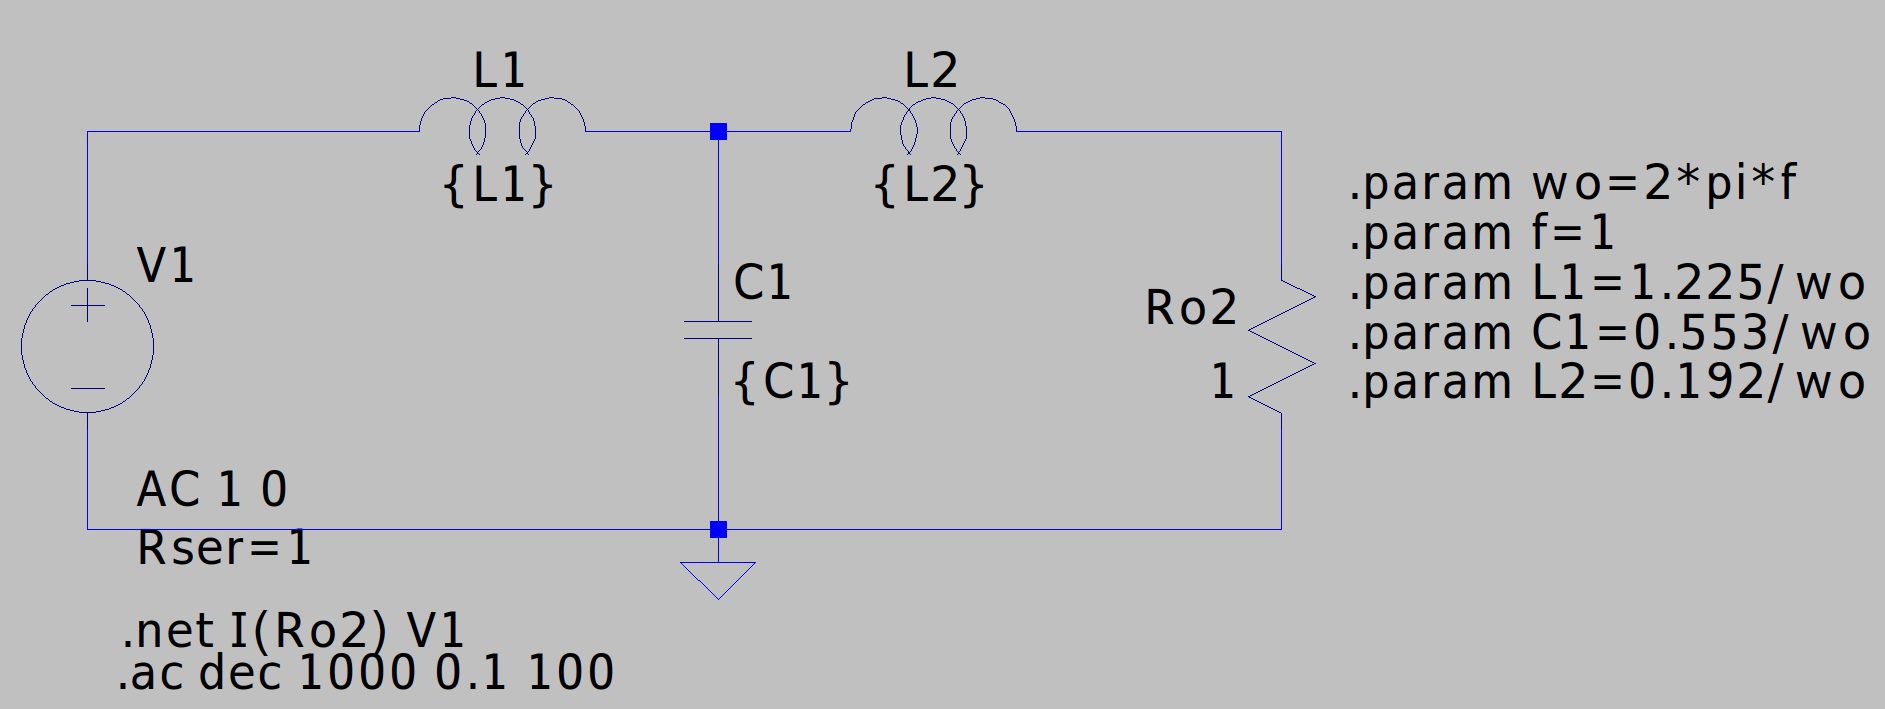
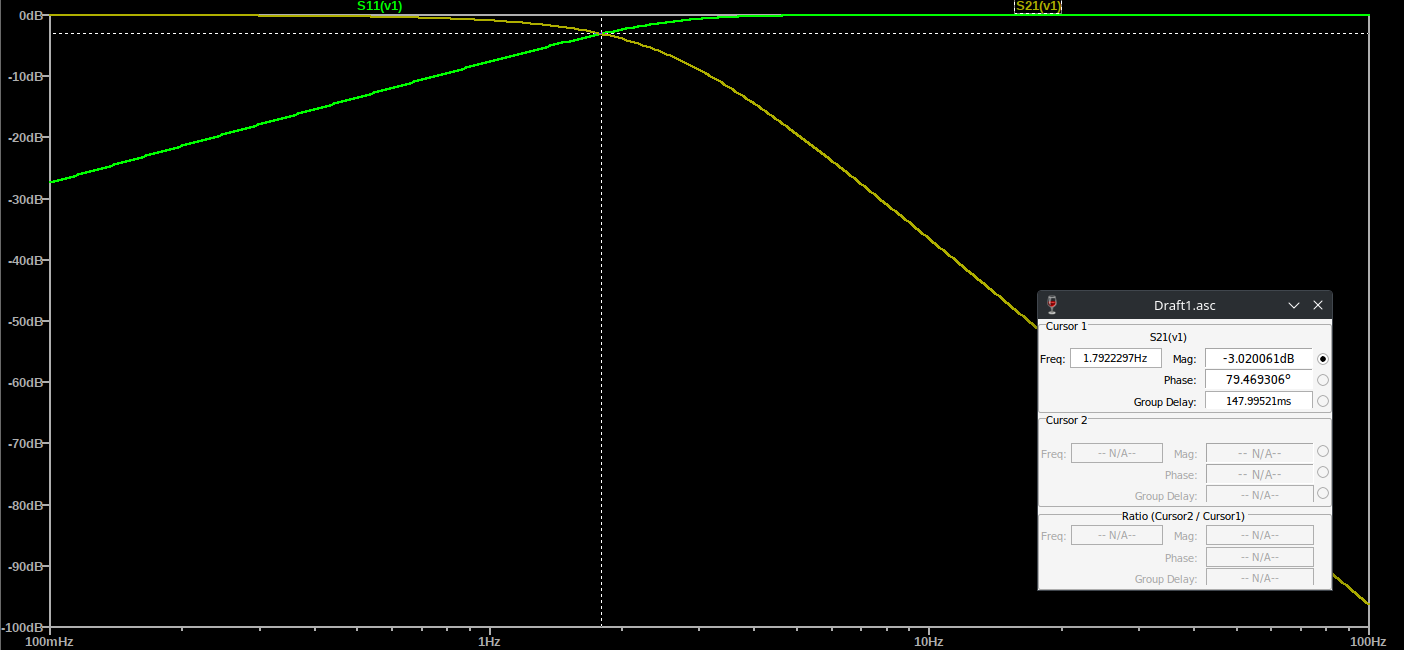
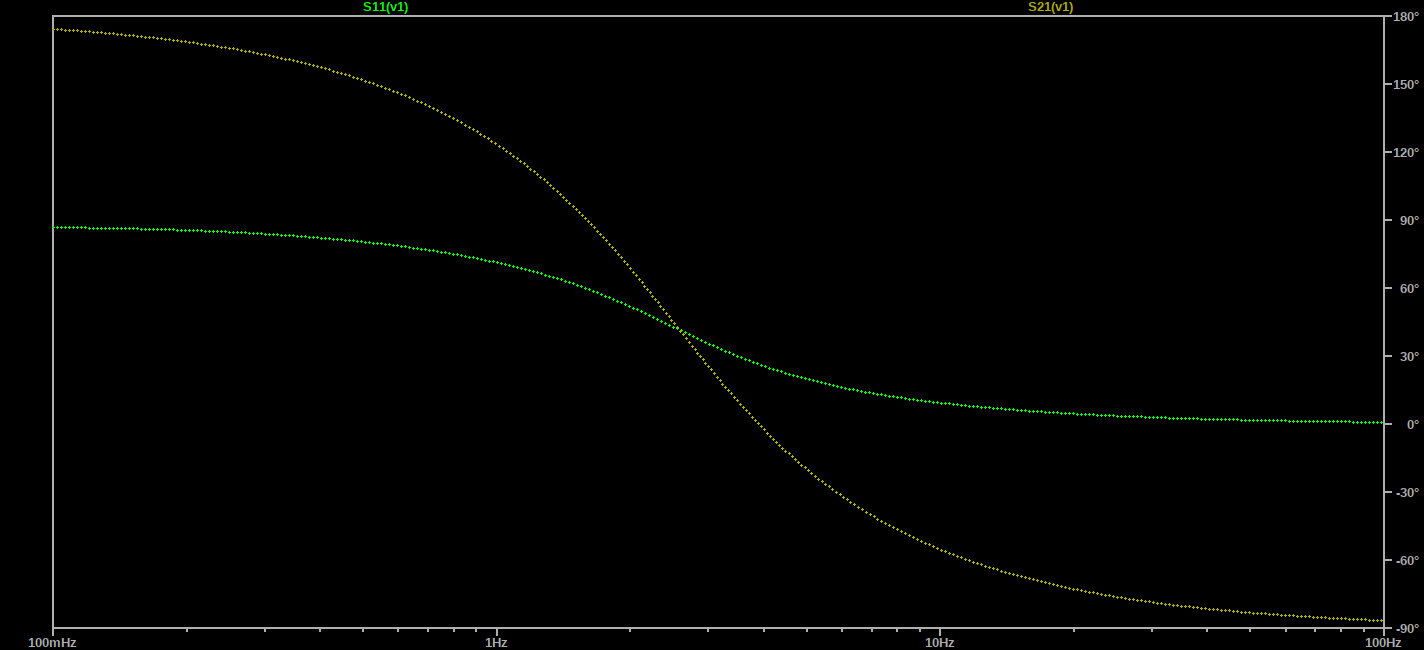

#### Comportamiento de S11

**Centro de la banda de paso**

En el centro de la banda de paso, es decir, para frecuencias altas, el cuadripolo refleja toda la potencia ya que S11=0dB

**Frecuencia de corte**

La frecuencia de corte es la frecuencia donde se interseca S11 con S12, es decir, son iguales. Por lo tanto, para la frecuencia de corte, mitad de la potencia que llega al cuadripolo se refleja y la otra mitad pasa a la carga.


**Transición y centro de la banda de detenida**

Para la banda de detenida, S11 tiende a 0. Esto quiere decir que para bajas frecuencias el cuadripolo A está adaptado y toda la potencia que entra al cuadripolo pasa a la carga.


